DATA SCIENCE INTERN @BHARAT INTERN

AUTHOR : sakshi mishra

TASK 1 : STOCK PREDICTION

PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

ABOUT DATASET

Google Stock Prediction

This dataset contains historical data of Google's stock prices and related attributes. It consists of 14 columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:

Symbol: The name of the company, which is GOOG in this case.

Date: The year and date of the stock data.

Close: The closing price of Google's stock on a particular day.

High: The highest value reached by Google's stock on the given day.

Low: The lowest value reached by Google's stock on the given day.

Open: The opening value of Google's stock on the given day.

Volume: The trading volume of Google's stock on the given day, i.e., the number of shares traded.

adjClose: The adjusted closing price of Google's stock, considering factors such as dividends and stock splits.

adjHigh: The adjusted highest value reached by Google's stock on the given day.

adjLow: The adjusted lowest value reached by Google's stock on the given day.

adjOpen: The adjusted opening value of Google's stock on the given day.

adjVolume: The adjusted trading volume of Google's stock on the given day,
accounting for factors such as stock splits.

divCash: The amount of cash dividend paid out to shareholders on the given day.

splitFactor: The split factor, if any, applied to Google's stock on the given day. A split factor of 1 indicates no split.

The dataset is available at Kaggle : https://www.kaggle.com/datasets/varpit94/google-stock-data









STEPS INVOLVED :

1 . IMPORTING LIBRARIES AND DATA TO BE USED
2. GATHERING INSIGHTS
3. DATA PRE-PROCESSING
4. CREATING LSTM MODEL
5. VISUALIZING ACTUAL VS PREDICTED DATA


#IMPORTING LIBRARIES AND DATA TO BE USED


In [ ]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [5]:
df = pd.read_csv('/content/GOOGL.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
5,2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094898
6,2004-08-27,54.104103,54.364365,52.897900,53.128128,53.128128,6211782
7,2004-08-30,52.692692,52.797798,51.056057,51.056057,51.056057,5196798
8,2004-08-31,51.201202,51.906906,51.131130,51.236237,51.236237,4917877
9,2004-09-01,51.401402,51.536537,49.884884,50.175175,50.175175,9138253


#GATHERING INSIGHTS


In [ ]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (4431, 7)


In [ ]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [ ]:
# summary of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [ ]:
# checking null values
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##There are no null value in the database

In [ ]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)


,Open,Close
Date,,
2004-08-19,50.050049,50.220219
2004-08-20,50.555557,54.209209
2004-08-23,55.430431,54.754753
2004-08-24,55.675674,52.487488
2004-08-25,52.532532,53.053055
2004-08-26,52.527527,54.009010
2004-08-27,54.104103,53.128128
2004-08-30,52.692692,51.056057
2004-08-31,51.201202,51.236237


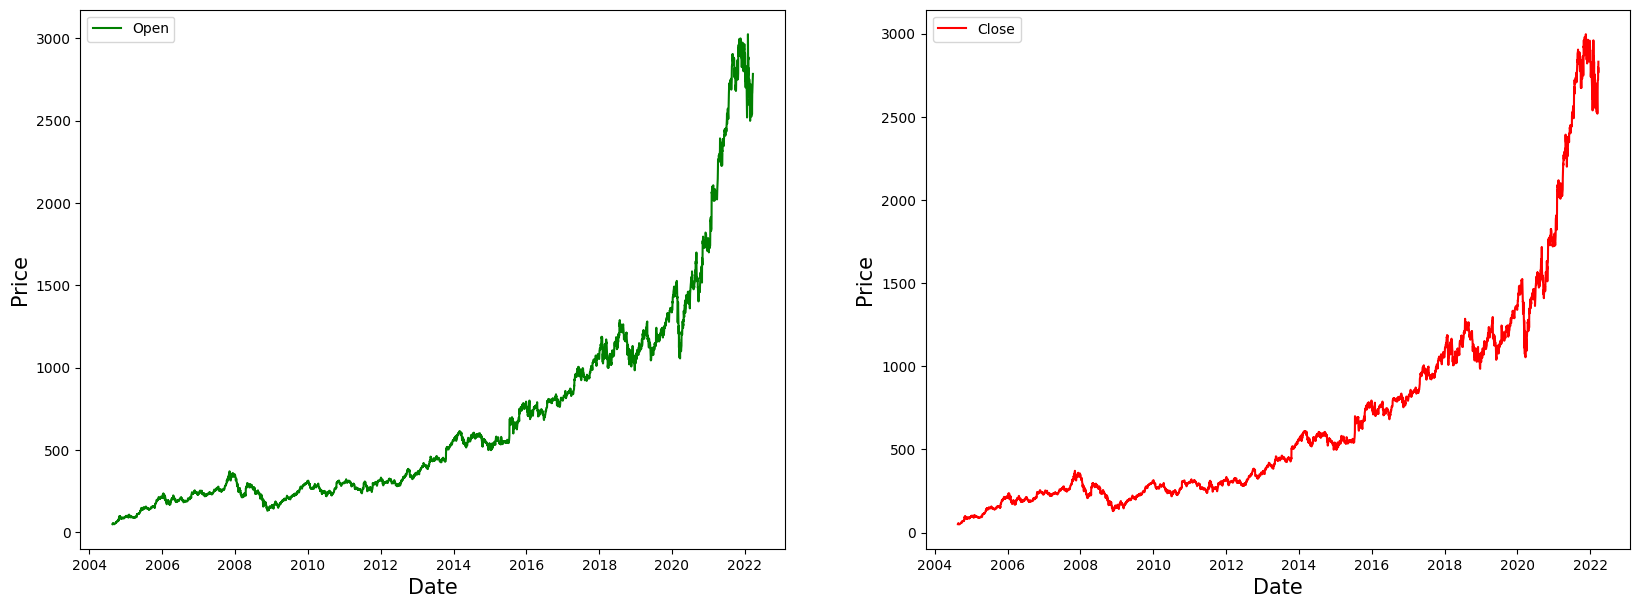

In [ ]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

#DATA PRE-PROCESSING

In [ ]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2004-08-19,0.000136,0.000056
2004-08-20,0.000306,0.001410
2004-08-23,0.001945,0.001595
2004-08-24,0.002027,0.000825
2004-08-25,0.000971,0.001017
2004-08-26,0.000969,0.001342
2004-08-27,0.001499,0.001043
2004-08-30,0.001024,0.000340
2004-08-31,0.000523,0.000401


In [ ]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

3323

In [ ]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((3323, 2), (1108, 2))

In [ ]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((3273, 50, 2), (3273, 2), (1058, 50, 2), (1058, 2))

#CREATING LSTM MODEL


In [ ]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)


Epoch 1/100
103/103 [==============================] - 6s 59ms/step - loss: 1.8618e-05 - mean_absolute_error: 0.0031 - val_loss: 9.7391e-04 - val_mean_absolute_error: 0.0218
Epoch 2/100
103/103 [==============================] - 7s 71ms/step - loss: 1.7959e-05 - mean_absolute_error: 0.0030 - val_loss: 4.7225e-04 - val_mean_absolute_error: 0.0146
Epoch 3/100
103/103 [==============================] - 6s 58ms/step - loss: 1.8843e-05 - mean_absolute_error: 0.0031 - val_loss: 4.9746e-04 - val_mean_absolute_error: 0.0149
Epoch 4/100
103/103 [==============================] - 7s 68ms/step - loss: 1.8746e-05 - mean_absolute_error: 0.0031 - val_loss: 5.3376e-04 - val_mean_absolute_error: 0.0156
Epoch 5/100
103/103 [==============================] - 6s 57ms/step - loss: 2.1737e-05 - mean_absolute_error: 0.0034 - val_loss: 7.9842e-04 - val_mean_absolute_error: 0.0196
Epoch 6/100
103/103 [==============================] - 7s 70ms/step - loss: 1.9024e-05 - mean_absolute_error: 0.0032 - val_loss: 8

In [ ]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

34/34 [==============================] - 2s 16ms/step


array([[0.35847157, 0.3620364 ],
       [0.36013016, 0.36369133],
       [0.36176917, 0.36533892],
       [0.36369434, 0.3672977 ],
       [0.3656474 , 0.36929226]], dtype=float32)

In [ ]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]


array([[1116.225 , 1116.8732],
       [1121.1598, 1121.7498],
       [1126.0365, 1126.6047],
       [1131.7645, 1132.3767],
       [1137.5756, 1138.254 ]], dtype=float32)

#VISUALIZING ACTUAL VS PREDIICTED DATA

In [ ]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,Columns=['Open_predicted','Close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

TypeError: ignored

In [ ]:
# Inversing normalization/scaling
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

NameError: ignored

In [ ]:
# @title Example form fields
# @markdown Forms support many types of fields.

no_type_checking = ''  # @param
string_type = 'example'  # @param {type: "string"}
slider_value = 142  # @param {type: "slider", min: 100, max: 200}
number = 102  # @param {type: "number"}
date = '2010-11-05'  # @param {type: "date"}
pick_me = "monday"  # @param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" # @param ["apples", "bananas", "oranges"] {allow-input: true}
# @markdown ---
